Loading the IMDB dataset

In [3]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [4]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [5]:
train_labels[0]

1

In [6]:
max([max(sequence) for sequence in train_data])

9999

Decoding reviews to text

In [7]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Preparing the data

Encoding the integer sequences via multi-hot encoding

In [8]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    result = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            result[i, j] = 1.
    return result
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [9]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [10]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Building the model different configurations

0. Model given by professor - Base point (model)

In [11]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

1. (Question 1) Building the model with 1 hidden layer (model_1_HL)

In [12]:
from tensorflow import keras
from tensorflow.keras import layers

model_1_HL = keras.Sequential([
    layers.Dense(16, activation="relu"), # Building the model with 1 hidden layer
    layers.Dense(1, activation="sigmoid")
])

model_1_HL.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

2. (Question 1) Building the model with 3 hidden layer (model_3_hl)

In [13]:
from tensorflow import keras
from tensorflow.keras import layers

model_3_HL = keras.Sequential([
    layers.Dense(16, activation="relu"), # hidden layer 1
    layers.Dense(16, activation="relu"), # hidden layer 2
    layers.Dense(16, activation="relu"), # hidden layer 3
    layers.Dense(1, activation="sigmoid")
])

model_3_HL.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

3. (Question 2) Building the model with fewer hidden units 32 (model_32_HU)

In [14]:
from tensorflow import keras
from tensorflow.keras import layers

model_32_HU = keras.Sequential([
    layers.Dense(32, activation="relu"), # hidden units 32
    layers.Dense(32, activation="relu"), # hidden units 32
    layers.Dense(1, activation="sigmoid")
    ])

model_32_HU.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

4. (Question 2) Building the model with higher hidden units 64 (model64_HU)

In [15]:
from tensorflow import keras
from tensorflow.keras import layers

model_64_HU = keras.Sequential([
    layers.Dense(64, activation="relu"), # hidden units 64
    layers.Dense(64, activation="relu"), # hidden units 64
    layers.Dense(1, activation="sigmoid")
    ])

model_64_HU.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

5. (Question 3) Building the base model with mse loss function (model_mse)

In [16]:
from tensorflow import keras
from tensorflow.keras import layers

model_mse = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model_mse.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])


6. (Question 4) Building the model with tanh activation

In [17]:
model_tanh = keras.Sequential([
    layers.Dense(16, activation="tanh"), # tanh activation
    layers.Dense(16, activation="tanh"), # tanh activation
    layers.Dense(1, activation="sigmoid")
])

model_tanh.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

7. (Question 5) Building the model with regularization (model_reg)

In [18]:
from tensorflow.keras import regularizers

model_reg = keras.Sequential([
    layers.Dense(16, activation="relu", kernel_regularizer=regularizers.l2(0.001)), # Applied L2 regularization (0.001 - common accepted value)
    layers.Dense(16, activation="relu", kernel_regularizer=regularizers.l2(0.001)), # Applied L2 regularization (0.001 - common accepted value)
    layers.Dense(1, activation="sigmoid")
])

model_reg.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

8. (Question 5) Building the model with dropout (model_drp)

In [19]:
model_drp = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

model_drp.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

Creating a validation set

In [20]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

### Training your model

### 0. Base model

In [21]:
Base_model = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.6974 - loss: 0.5966 - val_accuracy: 0.8686 - val_loss: 0.3895
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.8967 - loss: 0.3348 - val_accuracy: 0.8782 - val_loss: 0.3197
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.9233 - loss: 0.2378 - val_accuracy: 0.8768 - val_loss: 0.3048
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.9367 - loss: 0.1967 - val_accuracy: 0.8828 - val_loss: 0.2886
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.9498 - loss: 0.1624 - val_accuracy: 0.8881 - val_loss: 0.2765
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.9587 - loss: 0.1342 - val_accuracy: 0.8835 - val_loss: 0.2879
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.9700 - loss: 0.1076 - val_accuracy: 0.8849 - val_loss: 0.2986
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.9742 - loss: 0.0931 - val_accuracy: 0.8761 - v

In [22]:
Base_model_dict = Base_model.history
Base_model_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Plotting the graphshowing training and validation loss

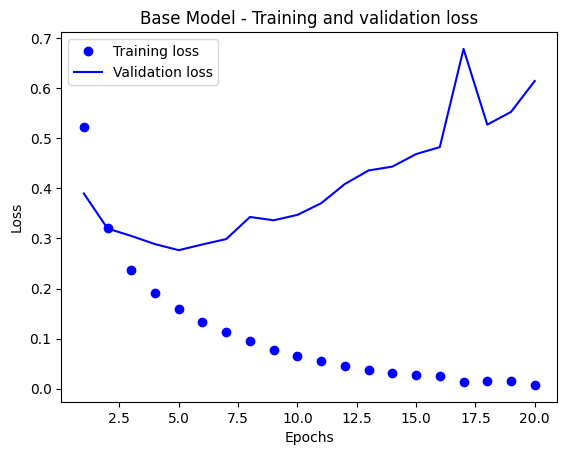

In [23]:
import matplotlib.pyplot as plt
Base_model_dict = Base_model.history
loss_values_0 = Base_model_dict["loss"]
val_loss_values_0 = Base_model_dict["val_loss"]
epochs = range(1, len(loss_values_0) + 1)
plt.plot(epochs, loss_values_0, "bo", label="Training loss")
plt.plot(epochs, val_loss_values_0, "b", label="Validation loss")
plt.title("Base Model - Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting Accuracy

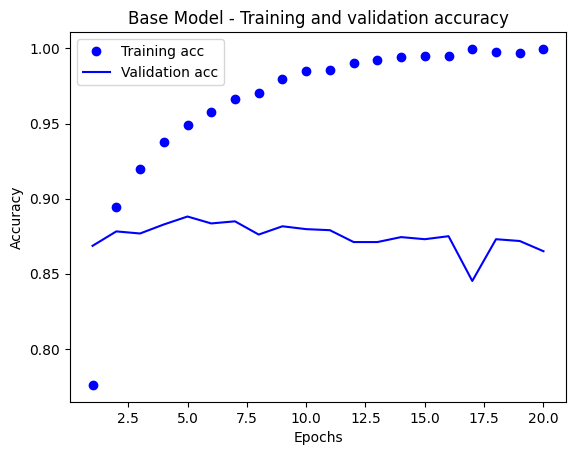

In [24]:
plt.clf()
acc_0 = Base_model_dict["accuracy"]
val_acc_0 = Base_model_dict["val_accuracy"]
plt.plot(epochs, acc_0, "bo", label="Training acc")
plt.plot(epochs, val_acc_0, "b", label="Validation acc")
plt.title("Base Model - Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Retraining

In [25]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
Base_model_results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.7418 - loss: 0.5551
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9013 - loss: 0.2901
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9244 - loss: 0.2126
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9346 - loss: 0.1871
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8842 - loss: 0.2920


In [26]:
Base_model_results

[0.28912267088890076, 0.8853200078010559]

Using Trained data to predict

In [27]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.22799769],
       [0.9998486 ],
       [0.95248413],
       ...,
       [0.12263317],
       [0.09509981],
       [0.679419  ]], dtype=float32)

### 1. Model With 1 Hidden Layer

In [28]:
Model_1_Hidden_Layer = model_1_HL.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - accuracy: 0.7005 - loss: 0.5936 - val_accuracy: 0.8557 - val_loss: 0.4138
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.8925 - loss: 0.3560 - val_accuracy: 0.8567 - val_loss: 0.3562
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9154 - loss: 0.2804 - val_accuracy: 0.8837 - val_loss: 0.3058
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.9264 - loss: 0.2352 - val_accuracy: 0.8904 - val_loss: 0.2836
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9381 - loss: 0.1988 - val_accuracy: 0.8797 - val_loss: 0.2963
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.9442 - loss: 0.1780 - val_accuracy: 0.8868 - val_loss: 0.2825
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.9497 - loss: 0.1645 - val_accuracy: 0.8861 - val_loss: 0.2742
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.9573 - loss: 0.1463 - val_accuracy: 0.8802 - 

In [29]:
Model_1_Hidden_Layer_dict = Model_1_Hidden_Layer.history
Model_1_Hidden_Layer_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Plotting the graphshowing training and validation loss

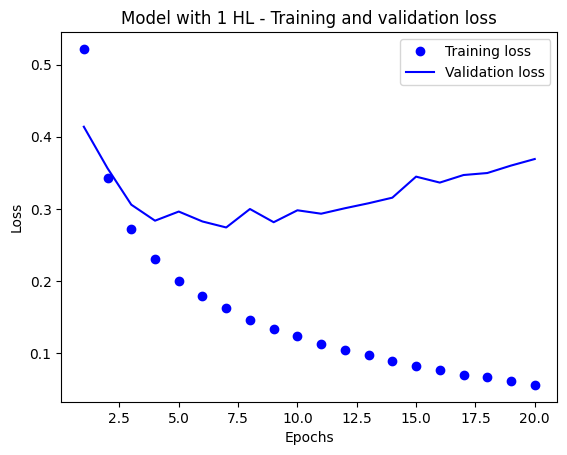

In [30]:
import matplotlib.pyplot as plt
Model_1_Hidden_Layer_dict = Model_1_Hidden_Layer.history
loss_values_1 = Model_1_Hidden_Layer_dict["loss"]
val_loss_values_1 = Model_1_Hidden_Layer_dict["val_loss"]
epochs = range(1, len(loss_values_1) + 1)
plt.plot(epochs, loss_values_1, "bo", label="Training loss")
plt.plot(epochs, val_loss_values_1, "b", label="Validation loss")
plt.title("Model with 1 HL - Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting Accuracy

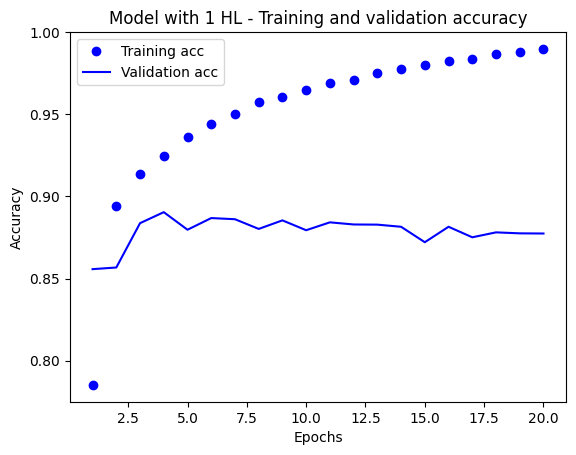

In [31]:
plt.clf()
acc_1 = Model_1_Hidden_Layer_dict["accuracy"]
val_acc_1 = Model_1_Hidden_Layer_dict["val_accuracy"]
plt.plot(epochs, acc_1, "bo", label="Training acc")
plt.plot(epochs, val_acc_1, "b", label="Validation acc")
plt.title("Model with 1 HL - Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Retraining

In [32]:
model_1_HL = keras.Sequential([
    layers.Dense(16, activation="relu"), # 1 Hidden Layer
    layers.Dense(1, activation="sigmoid")
])
model_1_HL.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model_1_HL.fit(x_train, y_train, epochs=4, batch_size=512)
Model_1_Hidden_Layer_Results = model_1_HL.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.7557 - loss: 0.5398
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.9032 - loss: 0.3006
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9182 - loss: 0.2350
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.9322 - loss: 0.1989
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8854 - loss: 0.2799


In [33]:
Model_1_Hidden_Layer_Results

[0.2789919972419739, 0.8875200152397156]

Using Trained data to predict

In [34]:
model_1_HL.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.28192753],
       [0.9995681 ],
       [0.72850716],
       ...,
       [0.1145136 ],
       [0.10991562],
       [0.53047806]], dtype=float32)

### 2. Model With 3 Hidden Layer

In [35]:
Model_3_Hidden_Layer = model_3_HL.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - accuracy: 0.6572 - loss: 0.6333 - val_accuracy: 0.8629 - val_loss: 0.4280
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - accuracy: 0.8845 - loss: 0.3769 - val_accuracy: 0.8835 - val_loss: 0.3260
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.9191 - loss: 0.2602 - val_accuracy: 0.8788 - val_loss: 0.3082
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9382 - loss: 0.2058 - val_accuracy: 0.8816 - val_loss: 0.2923
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.9434 - loss: 0.1729 - val_accuracy: 0.8810 - val_loss: 0.3025
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.9571 - loss: 0.1395 - val_accuracy: 0.8859 - val_loss: 0.2840
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.9686 - loss: 0.1122 - val_accuracy: 0.8836 - val_loss: 0.3011
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.9720 - loss: 0.0959 - val_accuracy: 0.8772 - v

In [36]:
Model_3_Hidden_Layer_dict = Model_3_Hidden_Layer.history
Model_3_Hidden_Layer_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Plotting the graphshowing training and validation loss

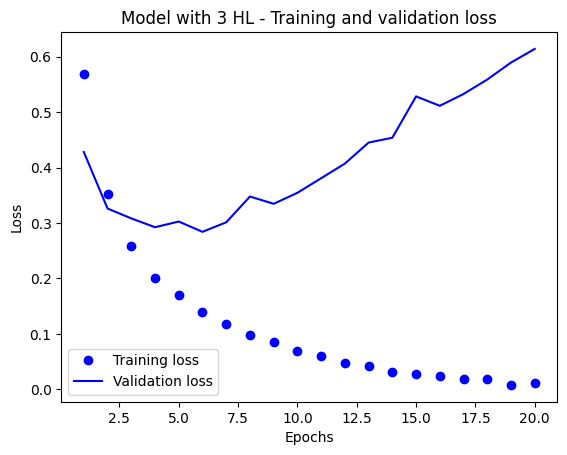

In [37]:
import matplotlib.pyplot as plt
Model_3_Hidden_Layer_dict = Model_3_Hidden_Layer.history
loss_values_3 = Model_3_Hidden_Layer_dict["loss"]
val_loss_values_3 = Model_3_Hidden_Layer_dict["val_loss"]
epochs = range(1, len(loss_values_3) + 1)
plt.plot(epochs, loss_values_3, "bo", label="Training loss")
plt.plot(epochs, val_loss_values_3, "b", label="Validation loss")
plt.title("Model with 3 HL - Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting Accuracy

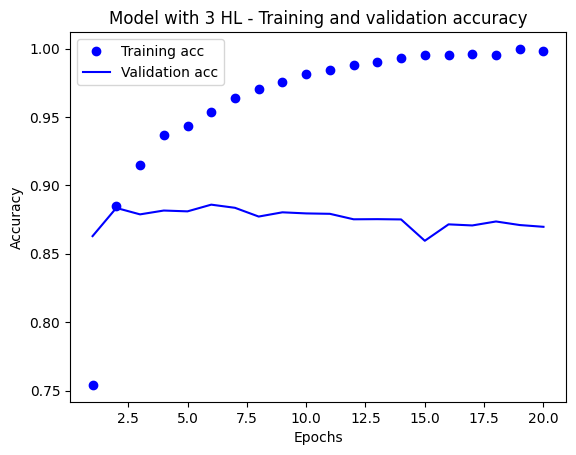

In [38]:
plt.clf()
acc_3 = Model_3_Hidden_Layer_dict["accuracy"]
val_acc_3 = Model_3_Hidden_Layer_dict["val_accuracy"]
plt.plot(epochs, acc_3, "bo", label="Training acc")
plt.plot(epochs, val_acc_3, "b", label="Validation acc")
plt.title("Model with 3 HL - Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Retraining

In [39]:
model_3_HL = keras.Sequential([
    layers.Dense(16, activation="relu"), # 1 Hidden Layer
    layers.Dense(16, activation="relu"), # 2 Hidden Layer
    layers.Dense(16, activation="relu"), # 3 Hidden Layer
    layers.Dense(1, activation="sigmoid")
])
model_3_HL.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model_3_HL.fit(x_train, y_train, epochs=6, batch_size=512) # Epochs selected 6 because it starts to dip from 7
Model_3_Hidden_Layer_Results = model_3_HL.evaluate(x_test, y_test)

Epoch 1/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.6973 - loss: 0.5976
Epoch 2/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.8957 - loss: 0.3089
Epoch 3/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9188 - loss: 0.2275
Epoch 4/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9341 - loss: 0.1857
Epoch 5/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9412 - loss: 0.1660
Epoch 6/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9537 - loss: 0.1353
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8770 - loss: 0.3219


In [40]:
Model_3_Hidden_Layer_Results

[0.320931613445282, 0.8784800171852112]

Using Trained data to predict

In [41]:
model_3_HL.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.11318899],
       [0.999449  ],
       [0.5291332 ],
       ...,
       [0.06181028],
       [0.02883413],
       [0.7045966 ]], dtype=float32)

### 3. Model With 32 Hidden Units

In [42]:
Model_32_Hidden_Units = model_32_HU.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step - accuracy: 0.6638 - loss: 0.5989 - val_accuracy: 0.8722 - val_loss: 0.3651
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.8913 - loss: 0.3201 - val_accuracy: 0.8817 - val_loss: 0.3024
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.9230 - loss: 0.2257 - val_accuracy: 0.8784 - val_loss: 0.3030
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.9372 - loss: 0.1868 - val_accuracy: 0.8874 - val_loss: 0.2825
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.9519 - loss: 0.1462 - val_accuracy: 0.8858 - val_loss: 0.2836
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - accuracy: 0.9594 - loss: 0.1273 - val_accuracy: 0.8698 - val_loss: 0.3546
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.9687 - loss: 0.1043 - val_accuracy: 0.8824 - val_loss: 0.3109
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.9756 - loss: 0.0841 - val_accuracy: 0.8816 - 

In [43]:
Model_32_Hidden_Units_dict = Model_32_Hidden_Units.history
Model_32_Hidden_Units_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Plotting the graphshowing training and validation loss

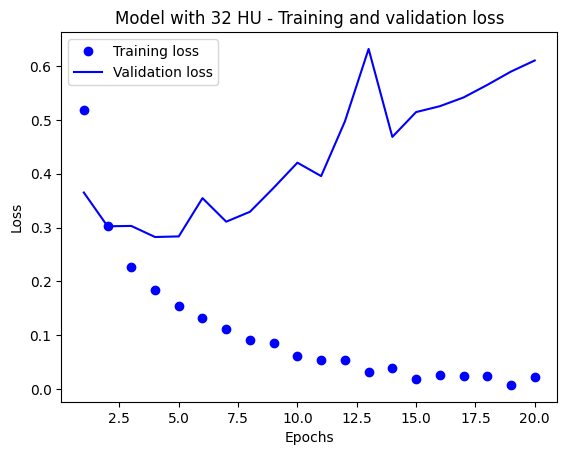

In [44]:
import matplotlib.pyplot as plt
Model_32_Hidden_Units_dict = Model_32_Hidden_Units.history
loss_values_32 = Model_32_Hidden_Units_dict["loss"]
val_loss_values_32 = Model_32_Hidden_Units_dict["val_loss"]
epochs = range(1, len(loss_values_32) + 1)
plt.plot(epochs, loss_values_32, "bo", label="Training loss")
plt.plot(epochs, val_loss_values_32, "b", label="Validation loss")
plt.title("Model with 32 HU - Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting Accuracy

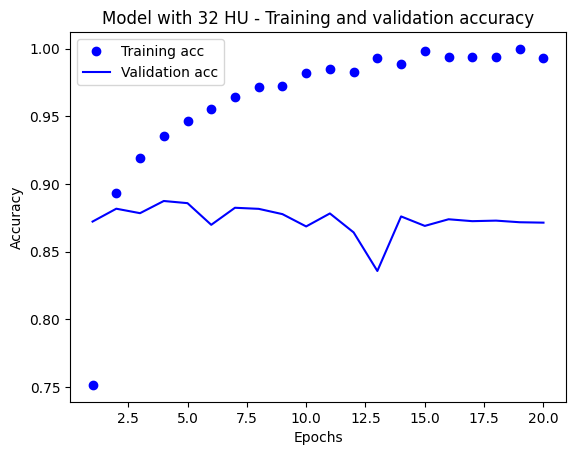

In [45]:
plt.clf()
acc_32 = Model_32_Hidden_Units_dict["accuracy"]
val_acc_32 = Model_32_Hidden_Units_dict["val_accuracy"]
plt.plot(epochs, acc_32, "bo", label="Training acc")
plt.plot(epochs, val_acc_32, "b", label="Validation acc")
plt.title("Model with 32 HU - Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Retraining

In [46]:
model_32_HU = keras.Sequential([
    layers.Dense(32, activation="relu"), # 32 Hidden Units
    layers.Dense(32, activation="relu"), # 32 Hidden Units
    layers.Dense(1, activation="sigmoid")
])
model_32_HU.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model_32_HU.fit(x_train, y_train, epochs=3, batch_size=512) # Epochs selected 3 because it starts to dip from 3
Model_32_Hidden_Units_Results = model_32_HU.evaluate(x_test, y_test)

Epoch 1/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - accuracy: 0.7300 - loss: 0.5537
Epoch 2/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.8951 - loss: 0.2797
Epoch 3/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9209 - loss: 0.2154
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8680 - loss: 0.3312


In [47]:
Model_32_Hidden_Units_Results

[0.3259570300579071, 0.8698800206184387]

Using Trained data to predict

In [48]:
model_32_HU.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


array([[0.31971765],
       [0.99994004],
       [0.9784969 ],
       ...,
       [0.2161122 ],
       [0.16920571],
       [0.78532577]], dtype=float32)

### 4. Model With 64 Hidden Units

In [49]:
Model_64_Hidden_Units = model_64_HU.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - accuracy: 0.6923 - loss: 0.5974 - val_accuracy: 0.7869 - val_loss: 0.4522
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - accuracy: 0.8647 - loss: 0.3308 - val_accuracy: 0.8902 - val_loss: 0.2877
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.9238 - loss: 0.2171 - val_accuracy: 0.8870 - val_loss: 0.2792
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.9357 - loss: 0.1840 - val_accuracy: 0.8842 - val_loss: 0.2909
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.9491 - loss: 0.1470 - val_accuracy: 0.8861 - val_loss: 0.2882
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.9626 - loss: 0.1128 - val_accuracy: 0.8852 - val_loss: 0.3107
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - accuracy: 0.9664 - loss: 0.1001 - val_accuracy: 0.8349 - val_loss: 0.5122
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.9618 - loss: 0.0988 - val_accuracy: 0.8747 - 

In [50]:
Model_64_Hidden_Units_dict = Model_64_Hidden_Units.history
Model_64_Hidden_Units_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Plotting the graphshowing training and validation loss

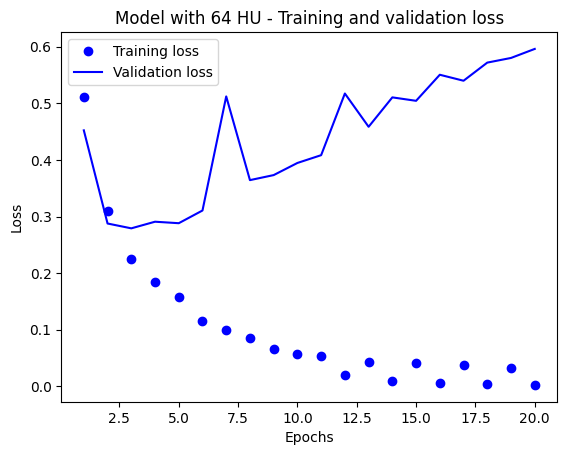

In [51]:
import matplotlib.pyplot as plt
Model_64_Hidden_Units_dict = Model_64_Hidden_Units.history
loss_values_64 = Model_64_Hidden_Units_dict["loss"]
val_loss_values_64 = Model_64_Hidden_Units_dict["val_loss"]
epochs = range(1, len(loss_values_64) + 1)
plt.plot(epochs, loss_values_64, "bo", label="Training loss")
plt.plot(epochs, val_loss_values_64, "b", label="Validation loss")
plt.title("Model with 64 HU - Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting Accuracy

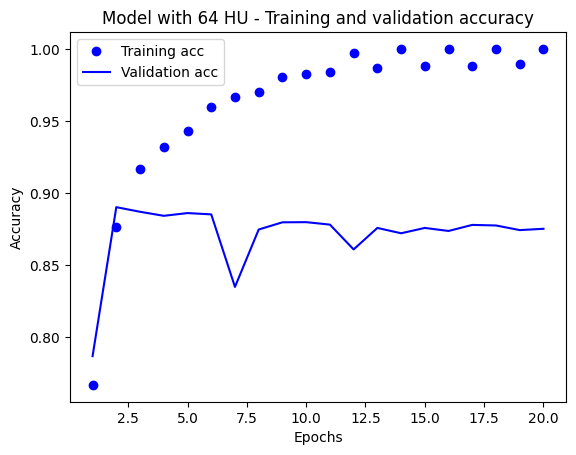

In [52]:
plt.clf()
acc_64 = Model_64_Hidden_Units_dict["accuracy"]
val_acc_64 = Model_64_Hidden_Units_dict["val_accuracy"]
plt.plot(epochs, acc_64, "bo", label="Training acc")
plt.plot(epochs, val_acc_64, "b", label="Validation acc")
plt.title("Model with 64 HU - Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Retraining

In [53]:
model_64_HU = keras.Sequential([
    layers.Dense(64, activation="relu"), # 64 Hidden Units
    layers.Dense(64, activation="relu"), # 64 Hidden Units
    layers.Dense(1, activation="sigmoid")
])
model_64_HU.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model_64_HU.fit(x_train, y_train, epochs=2, batch_size=512) # Epochs selected 2 because it starts to dip from 2
Model_64_Hidden_Units_Results = model_64_HU.evaluate(x_test, y_test)

Epoch 1/2
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.7320 - loss: 0.5363
Epoch 2/2
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.8937 - loss: 0.2757
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8860 - loss: 0.2844


In [54]:
Model_64_Hidden_Units_Results

[0.28239837288856506, 0.8865600228309631]

Using Trained data to predict

In [55]:
model_64_HU.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


array([[0.3095663 ],
       [0.9991541 ],
       [0.9556207 ],
       ...,
       [0.14667217],
       [0.15586323],
       [0.58818936]], dtype=float32)

### 5. Model With MSE Loss

In [56]:
Model_MSE_LOSS = model_mse.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - accuracy: 0.6523 - loss: 0.2234 - val_accuracy: 0.8442 - val_loss: 0.1487
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.8827 - loss: 0.1255 - val_accuracy: 0.8644 - val_loss: 0.1140
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.9014 - loss: 0.0925 - val_accuracy: 0.8852 - val_loss: 0.0942
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9249 - loss: 0.0716 - val_accuracy: 0.8765 - val_loss: 0.0957
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9367 - loss: 0.0609 - val_accuracy: 0.8699 - val_loss: 0.0969
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.9468 - loss: 0.0522 - val_accuracy: 0.8826 - val_loss: 0.0859
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.9527 - loss: 0.0465 - val_accuracy: 0.8838 - val_loss: 0.0855
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.9584 - loss: 0.0410 - val_accuracy: 0.8838 - v

In [57]:
Model_MSE_LOSS_dict = Model_MSE_LOSS.history
Model_MSE_LOSS_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Plotting the graphshowing training and validation loss

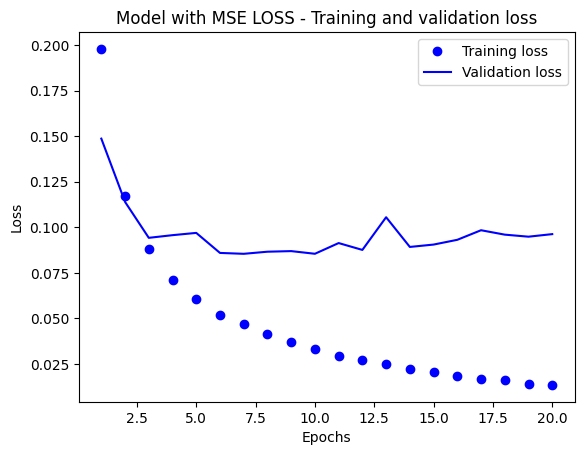

In [58]:
import matplotlib.pyplot as plt
Model_MSE_LOSS_dict = Model_MSE_LOSS.history
loss_values_MSE = Model_MSE_LOSS_dict["loss"]
val_loss_values_MSE = Model_MSE_LOSS_dict["val_loss"]
epochs = range(1, len(loss_values_MSE) + 1)
plt.plot(epochs, loss_values_MSE, "bo", label="Training loss")
plt.plot(epochs, val_loss_values_MSE, "b", label="Validation loss")
plt.title("Model with MSE LOSS - Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting Accuracy

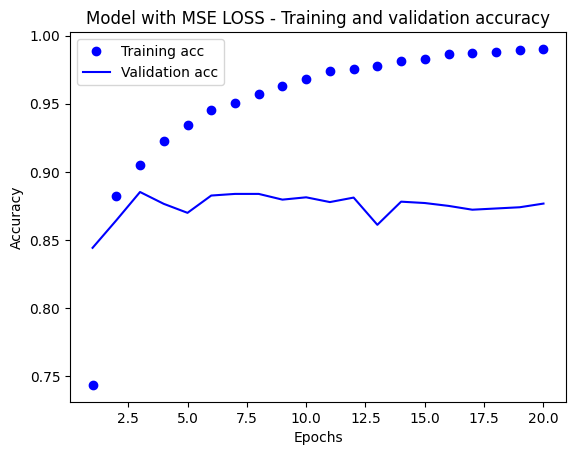

In [59]:
plt.clf()
acc_MSE = Model_MSE_LOSS_dict["accuracy"]
val_acc_MSE = Model_MSE_LOSS_dict["val_accuracy"]
plt.plot(epochs, acc_MSE, "bo", label="Training acc")
plt.plot(epochs, val_acc_MSE, "b", label="Validation acc")
plt.title("Model with MSE LOSS - Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Retraining

In [60]:
model_mse = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_mse.compile(optimizer="rmsprop",
              loss="mse", # MSE Loss Function
              metrics=["accuracy"])
model_mse.fit(x_train, y_train, epochs=4, batch_size=512) # Epochs selected 2 because it starts to dip from 2
Model_MSE_LOSS_Results = model_mse.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - accuracy: 0.7285 - loss: 0.1939
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.8961 - loss: 0.0919
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9211 - loss: 0.0687
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9299 - loss: 0.0590
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8821 - loss: 0.0854


In [61]:
Model_MSE_LOSS_Results

[0.08467386662960052, 0.8850399851799011]

Using Trained data to predict

In [62]:
model_mse.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.14491042],
       [0.9959213 ],
       [0.78371334],
       ...,
       [0.11649437],
       [0.07200586],
       [0.42990834]], dtype=float32)

### 6. Model With tanh activation

In [63]:
Model_TANH_ACT = model_tanh.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - accuracy: 0.7162 - loss: 0.5673 - val_accuracy: 0.8035 - val_loss: 0.4334
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.8925 - loss: 0.3184 - val_accuracy: 0.8783 - val_loss: 0.3026
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9239 - loss: 0.2220 - val_accuracy: 0.8829 - val_loss: 0.2861
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.9483 - loss: 0.1628 - val_accuracy: 0.8858 - val_loss: 0.2780
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.9598 - loss: 0.1268 - val_accuracy: 0.8804 - val_loss: 0.3038
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.9607 - loss: 0.1147 - val_accuracy: 0.8755 - val_loss: 0.3495
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.9746 - loss: 0.0886 - val_accuracy: 0.8807 - val_loss: 0.3440
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.9816 - loss: 0.0625 - val_accuracy: 0.8771 - 

In [64]:
Model_TANH_ACT_dict = Model_TANH_ACT.history
Model_TANH_ACT_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Plotting the graphshowing training and validation loss

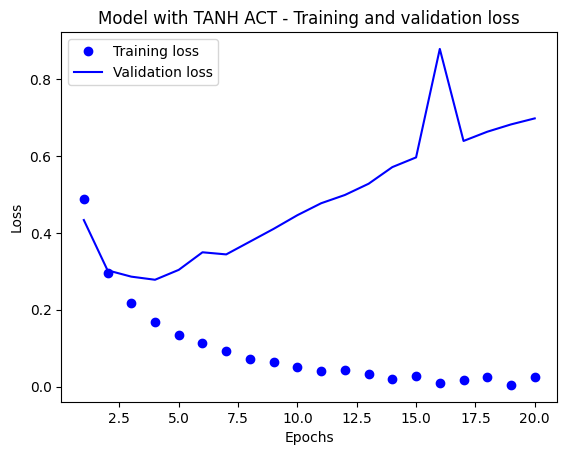

In [65]:
import matplotlib.pyplot as plt
Model_TANH_ACT_dict = Model_TANH_ACT.history
loss_values_TANH = Model_TANH_ACT_dict["loss"]
val_loss_values_TANH = Model_TANH_ACT_dict["val_loss"]
epochs = range(1, len(loss_values_TANH) + 1)
plt.plot(epochs, loss_values_TANH, "bo", label="Training loss")
plt.plot(epochs, val_loss_values_TANH, "b", label="Validation loss")
plt.title("Model with TANH ACT - Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting Accuracy

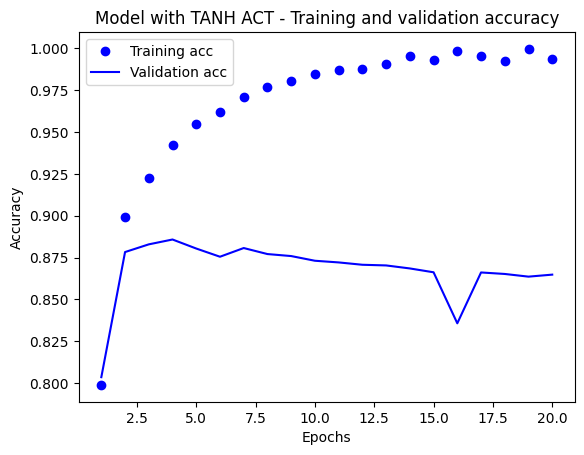

In [66]:
plt.clf()
acc_TANH = Model_TANH_ACT_dict["accuracy"]
val_acc_TANH = Model_TANH_ACT_dict["val_accuracy"]
plt.plot(epochs, acc_TANH, "bo", label="Training acc")
plt.plot(epochs, val_acc_TANH, "b", label="Validation acc")
plt.title("Model with TANH ACT - Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Retraining

In [67]:
model_tanh = keras.Sequential([
    layers.Dense(16, activation="tanh"), # tanh activation
    layers.Dense(16, activation="tanh"), # tanh activation
    layers.Dense(1, activation="sigmoid")
])
model_tanh.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model_tanh.fit(x_train, y_train, epochs=3, batch_size=512) # Epochs selected 3 because it starts to dip from 3
Model_TANH_ACT_Results = model_tanh.evaluate(x_test, y_test)

Epoch 1/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.7514 - loss: 0.5250
Epoch 2/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.9096 - loss: 0.2531
Epoch 3/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9343 - loss: 0.1857
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8817 - loss: 0.2902


In [68]:
Model_TANH_ACT_Results

[0.2895728051662445, 0.8831200003623962]

Using Trained data to predict

In [69]:
model_tanh.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.13841178],
       [0.9971908 ],
       [0.72790486],
       ...,
       [0.08867427],
       [0.05400304],
       [0.52844614]], dtype=float32)

### 7. Model With L2 Regularization

In [70]:
Model_Reg_Tech = model_reg.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - accuracy: 0.6946 - loss: 0.6347 - val_accuracy: 0.8692 - val_loss: 0.4308
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.8951 - loss: 0.3782 - val_accuracy: 0.8747 - val_loss: 0.3725
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.9168 - loss: 0.2969 - val_accuracy: 0.8888 - val_loss: 0.3351
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - accuracy: 0.9379 - loss: 0.2498 - val_accuracy: 0.8876 - val_loss: 0.3275
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.9439 - loss: 0.2261 - val_accuracy: 0.8750 - val_loss: 0.3603
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.9556 - loss: 0.2043 - val_accuracy: 0.8868 - val_loss: 0.3363
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9578 - loss: 0.1923 - val_accuracy: 0.8843 - val_loss: 0.3427
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9695 - loss: 0.1737 - val_accuracy: 0.8830 - v

In [71]:
Model_Reg_Tech_dict = Model_Reg_Tech.history
Model_Reg_Tech_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Plotting the graphshowing training and validation loss

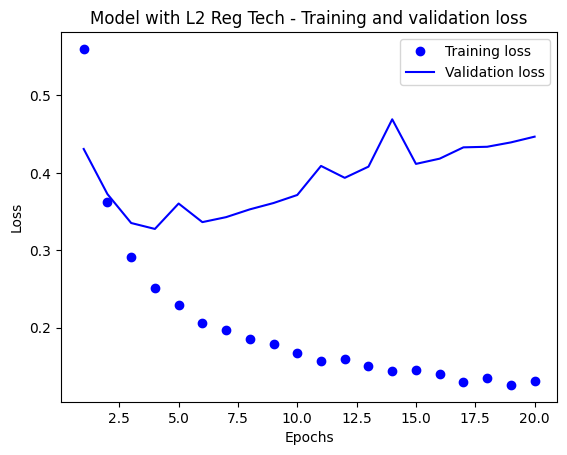

In [72]:
import matplotlib.pyplot as plt
Model_Reg_Tech_dict = Model_Reg_Tech.history
loss_values_Reg = Model_Reg_Tech_dict["loss"]
val_loss_values_Reg = Model_Reg_Tech_dict["val_loss"]
epochs = range(1, len(loss_values_Reg) + 1)
plt.plot(epochs, loss_values_Reg, "bo", label="Training loss")
plt.plot(epochs, val_loss_values_Reg, "b", label="Validation loss")
plt.title("Model with L2 Reg Tech - Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting Accuracy

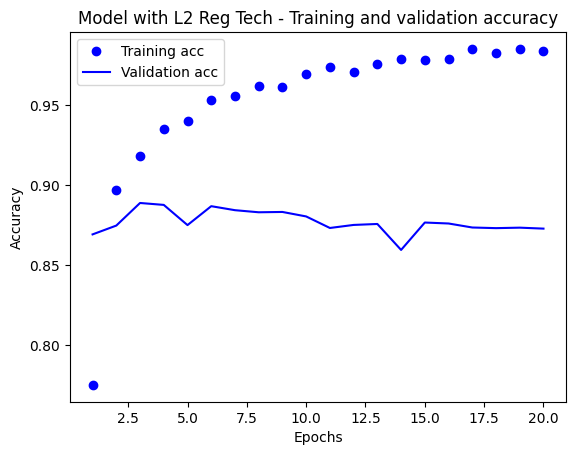

In [73]:
plt.clf()
acc_Reg = Model_Reg_Tech_dict["accuracy"]
val_acc_Reg = Model_Reg_Tech_dict["val_accuracy"]
plt.plot(epochs, acc_Reg, "bo", label="Training acc")
plt.plot(epochs, val_acc_Reg, "b", label="Validation acc")
plt.title("Model with L2 Reg Tech - Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Retraining

In [74]:
model_reg = keras.Sequential([
    layers.Dense(16, activation="relu", kernel_regularizer=regularizers.l2(0.001)), # Applied L2 regularization (0.001 - common accepted value)
    layers.Dense(16, activation="relu", kernel_regularizer=regularizers.l2(0.001)), # Applied L2 regularization (0.001 - common accepted value)
    layers.Dense(1, activation="sigmoid")
])
model_reg.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model_reg.fit(x_train, y_train, epochs=2, batch_size=512) # Epochs selected 2 because it starts to dip from 3
Model_Reg_Tech_Results = model_reg.evaluate(x_test, y_test)

Epoch 1/2
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.7403 - loss: 0.6040
Epoch 2/2
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.9010 - loss: 0.3415
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8864 - loss: 0.3413


In [75]:
Model_Reg_Tech_Results

[0.3397141396999359, 0.8874800205230713]

Using Trained data to predict

In [76]:
model_reg.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.3526502 ],
       [0.99453515],
       [0.90915567],
       ...,
       [0.1635122 ],
       [0.16128103],
       [0.59871894]], dtype=float32)

### 8. Model With Dropout Technique`

In [77]:
Model_Drp_Tech = model_drp.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - accuracy: 0.5430 - loss: 0.6830 - val_accuracy: 0.8007 - val_loss: 0.6028
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.6782 - loss: 0.5890 - val_accuracy: 0.8596 - val_loss: 0.4811
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.7632 - loss: 0.5074 - val_accuracy: 0.8691 - val_loss: 0.4050
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.8110 - loss: 0.4447 - val_accuracy: 0.8755 - val_loss: 0.3693
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.8544 - loss: 0.4014 - val_accuracy: 0.8854 - val_loss: 0.3194
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8745 - loss: 0.3561 - val_accuracy: 0.8874 - val_loss: 0.2978
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.8954 - loss: 0.3269 - val_accuracy: 0.8883 - val_loss: 0.2882
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9021 - loss: 0.2969 - val_accuracy: 0.8895 - v

In [78]:
Model_Drp_Tech_dict = Model_Drp_Tech.history
Model_Drp_Tech_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Plotting the graphshowing training and validation loss

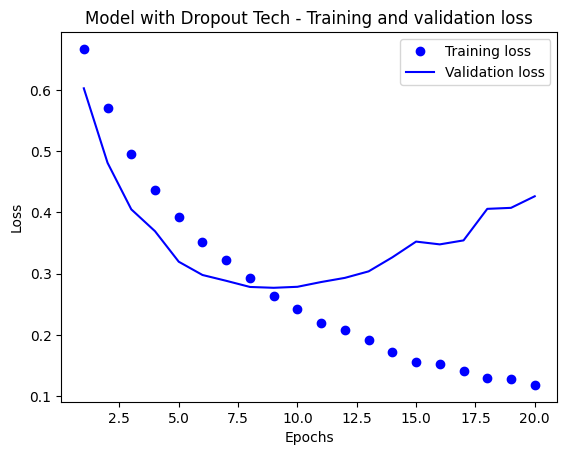

In [79]:
import matplotlib.pyplot as plt
Model_Drp_Tech_dict = Model_Drp_Tech.history
loss_values_Drp = Model_Drp_Tech_dict["loss"]
val_loss_values_Drp = Model_Drp_Tech_dict["val_loss"]
epochs = range(1, len(loss_values_Drp) + 1)
plt.plot(epochs, loss_values_Drp, "bo", label="Training loss")
plt.plot(epochs, val_loss_values_Drp, "b", label="Validation loss")
plt.title("Model with Dropout Tech - Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting Accuracy

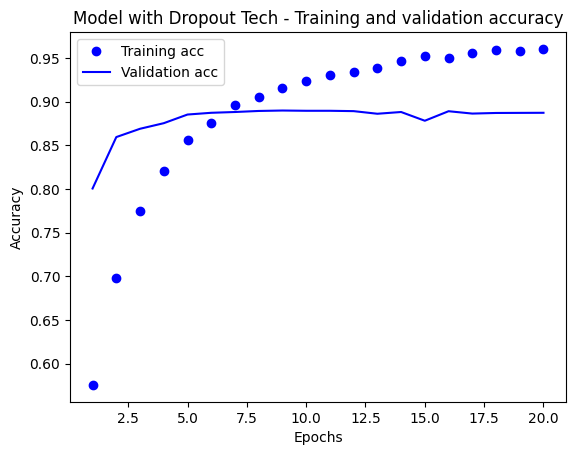

In [80]:
plt.clf()
acc_Drp = Model_Drp_Tech_dict["accuracy"]
val_acc_Drp = Model_Drp_Tech_dict["val_accuracy"]
plt.plot(epochs, acc_Drp, "bo", label="Training acc")
plt.plot(epochs, val_acc_Drp, "b", label="Validation acc")
plt.title("Model with Dropout Tech - Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Retraining

In [81]:
model_drp = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model_drp.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model_drp.fit(x_train, y_train, epochs=9, batch_size=512) # Epochs selected 9 because it starts to stablize from 9
Model_Drp_Tech_Results = model_drp.evaluate(x_test, y_test)

Epoch 1/9
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.5844 - loss: 0.6578
Epoch 2/9
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.7813 - loss: 0.5116
Epoch 3/9
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.8509 - loss: 0.4172
Epoch 4/9
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.8879 - loss: 0.3471
Epoch 5/9
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9092 - loss: 0.2952
Epoch 6/9
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9156 - loss: 0.2615
Epoch 7/9
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9293 - loss: 0.2316
Epoch 8/9
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.9350 - loss: 0.2089
Epoch 9/9
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9391 - loss: 0.1978
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8805 - loss: 0.3385


In [82]:
Model_Drp_Tech_Results

[0.34080618619918823, 0.8829600214958191]

Using Trained data to predict

In [83]:
model_drp.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


array([[0.02632068],
       [0.9991865 ],
       [0.8946457 ],
       ...,
       [0.02344085],
       [0.02045809],
       [0.3021622 ]], dtype=float32)

### Comparison of the Models

Retrieveing the training history for all models (For Organising)

In [84]:
Base_model_dict = Base_model.history
Base_model_dict.keys()

Model_1_Hidden_Layer_dict = Model_1_Hidden_Layer.history
Model_1_Hidden_Layer_dict.keys()

Model_3_Hidden_Layer_dict = Model_3_Hidden_Layer.history
Model_3_Hidden_Layer_dict.keys()

Model_32_Hidden_Units_dict = Model_32_Hidden_Units.history
Model_32_Hidden_Units_dict.keys()

Model_64_Hidden_Units_dict = Model_64_Hidden_Units.history
Model_64_Hidden_Units_dict.keys()

Model_MSE_LOSS_dict = Model_MSE_LOSS.history
Model_MSE_LOSS_dict.keys()

Model_TANH_ACT_dict = Model_TANH_ACT.history
Model_TANH_ACT_dict.keys()

Model_Reg_Tech_dict = Model_Reg_Tech.history
Model_Reg_Tech_dict.keys()

Model_Drp_Tech_dict = Model_Drp_Tech.history
Model_Drp_Tech_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Question 1 - Comparing Hidden layers with Base Model


Base_Model history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_1_Hidden_Layer history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_3_Hidden_Layer history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


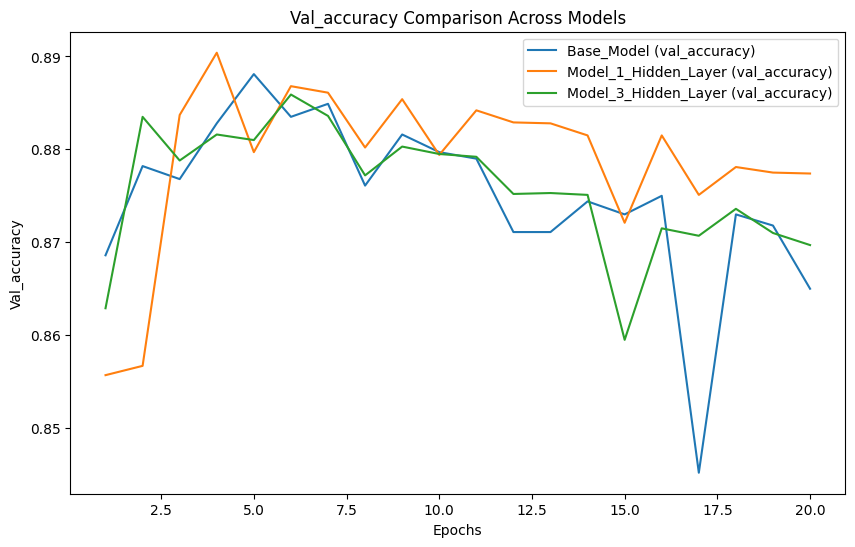

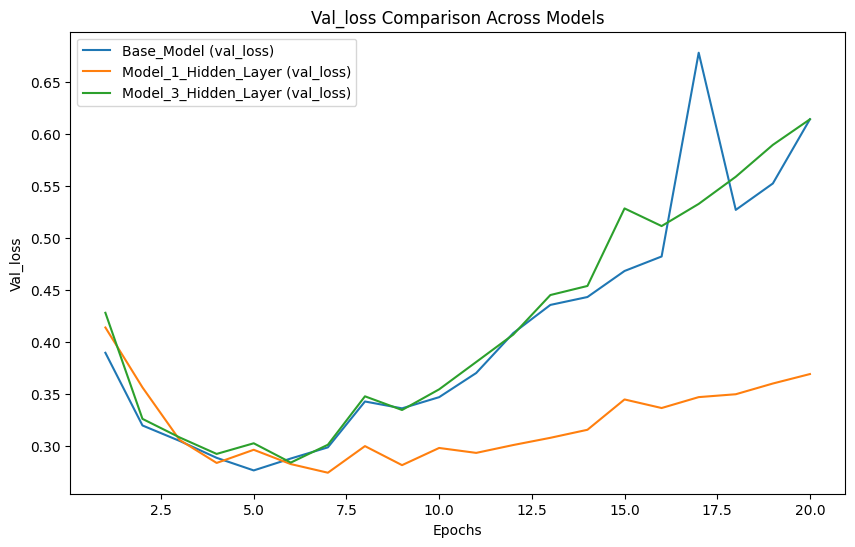

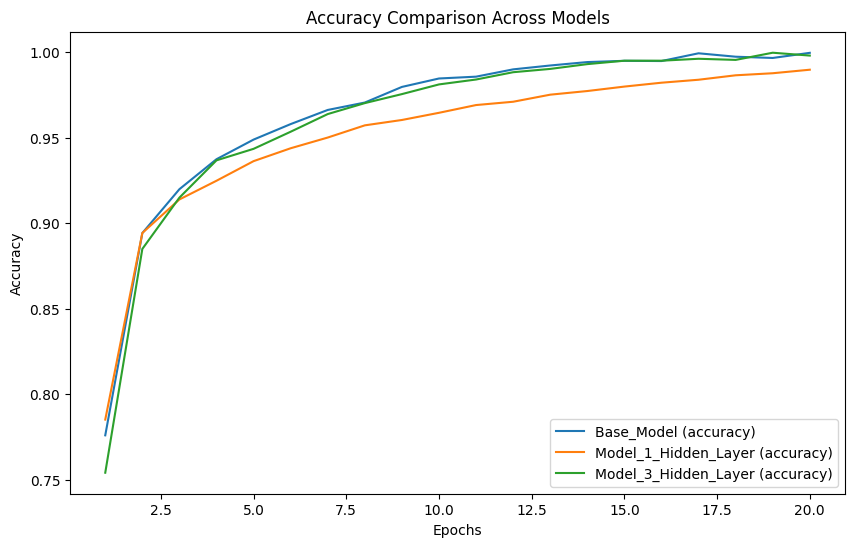

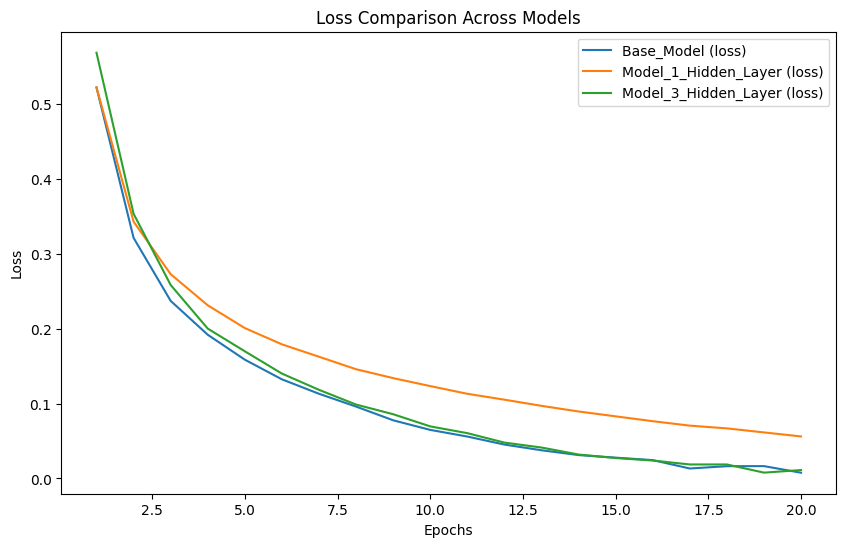

In [85]:
import matplotlib.pyplot as plt

# Dictionary of models and their histories
model_histories = {
    "Base_Model": Base_model,
    "Model_1_Hidden_Layer": Model_1_Hidden_Layer,
    "Model_3_Hidden_Layer": Model_3_Hidden_Layer,
}

# Extract and display keys of histories
for model_name, model in model_histories.items():
    history_dict = model.history
    print(f"{model_name} history keys: {history_dict.keys()}")

# Function to plot training and validation accuracy/loss across models
def plot_metrics(metric):
    plt.figure(figsize=(10, 6))
    for model_name, model in model_histories.items():
        metric_values = model.history[metric]
        plt.plot(range(1, len(metric_values) + 1), metric_values, label=f"{model_name} ({metric})")

    plt.title(f'{metric.capitalize()} Comparison Across Models')
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.show()

# Plot validation accuracy
plot_metrics('val_accuracy')

# Plot validation loss
plot_metrics('val_loss')

plot_metrics('accuracy')

plot_metrics('loss')

Question 2 - Comparing Base model with Hidden Units value of 16, 32 and 64

Base_Model history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_32_Hidden_Units history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_64_Hidden_Units history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


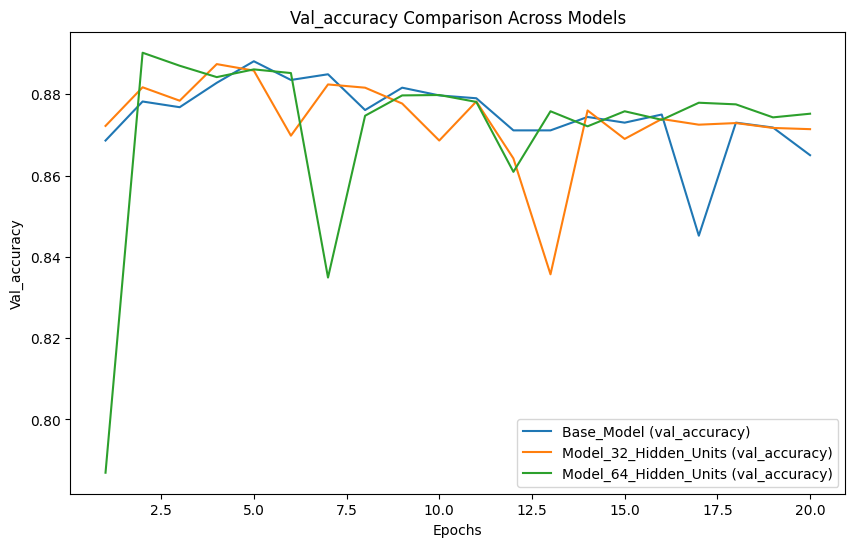

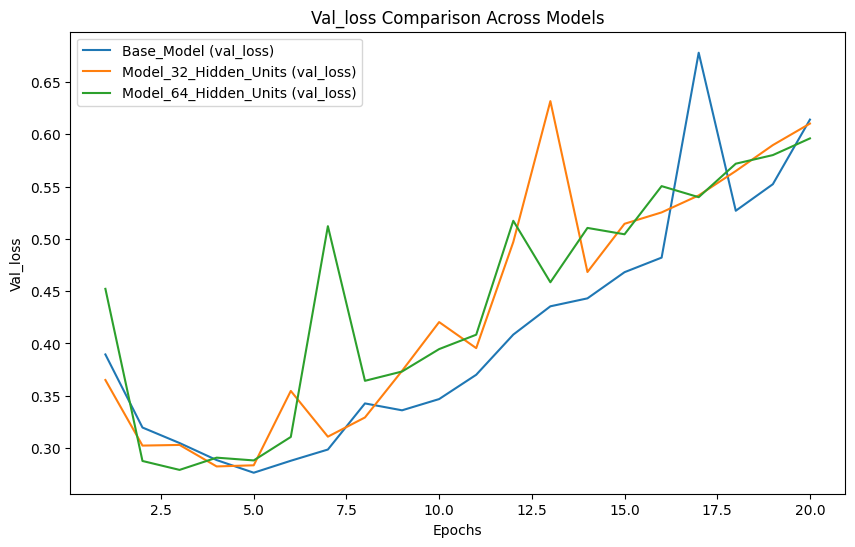

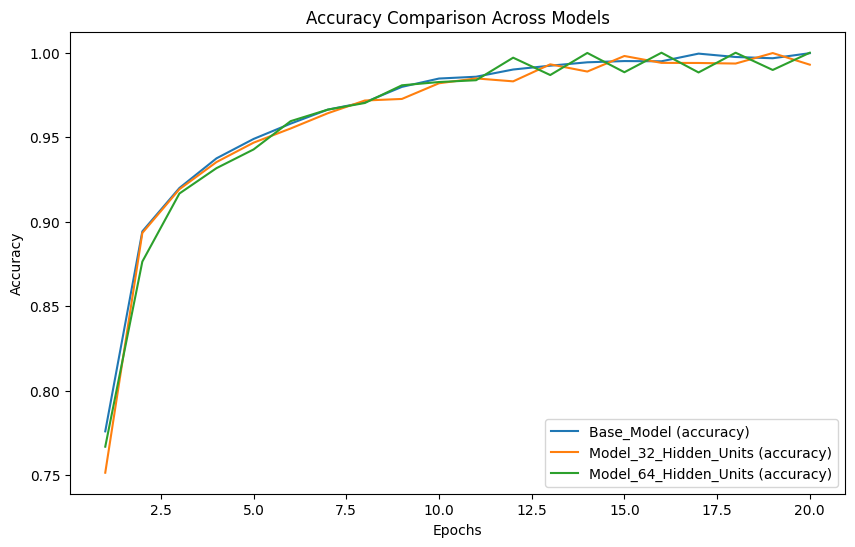

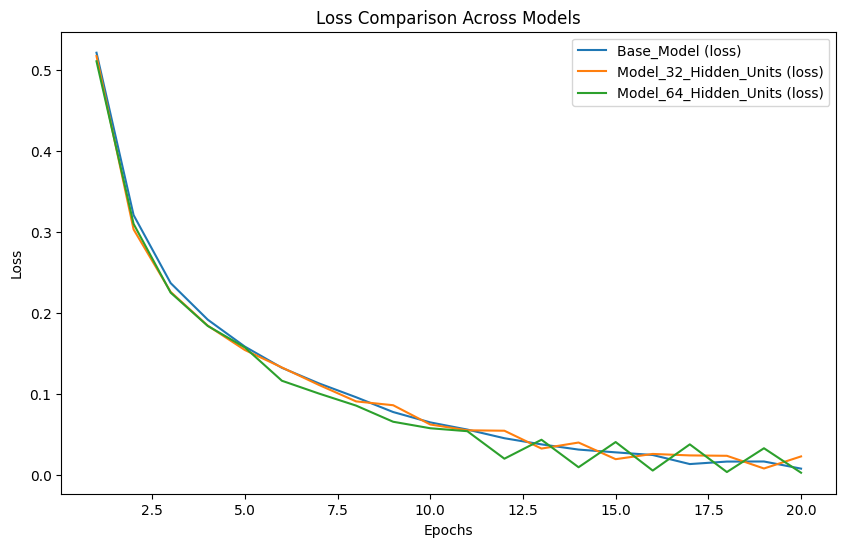

In [86]:
import matplotlib.pyplot as plt

# Dictionary of models and their histories
model_histories = {
    "Base_Model": Base_model,
    "Model_32_Hidden_Units": Model_32_Hidden_Units,
    "Model_64_Hidden_Units": Model_64_Hidden_Units,
}

# Extract and display keys of histories
for model_name, model in model_histories.items():
    history_dict = model.history
    print(f"{model_name} history keys: {history_dict.keys()}")

# Function to plot training and validation accuracy/loss across models
def plot_metrics(metric):
    plt.figure(figsize=(10, 6))
    for model_name, model in model_histories.items():
        metric_values = model.history[metric]
        plt.plot(range(1, len(metric_values) + 1), metric_values, label=f"{model_name} ({metric})")

    plt.title(f'{metric.capitalize()} Comparison Across Models')
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.show()

# Plot validation accuracy
plot_metrics('val_accuracy')

# Plot validation loss
plot_metrics('val_loss')

plot_metrics('accuracy')

plot_metrics('loss')

Question 3 - Comparing of MSE loss function

Base_Model history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_MSE_Loss history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


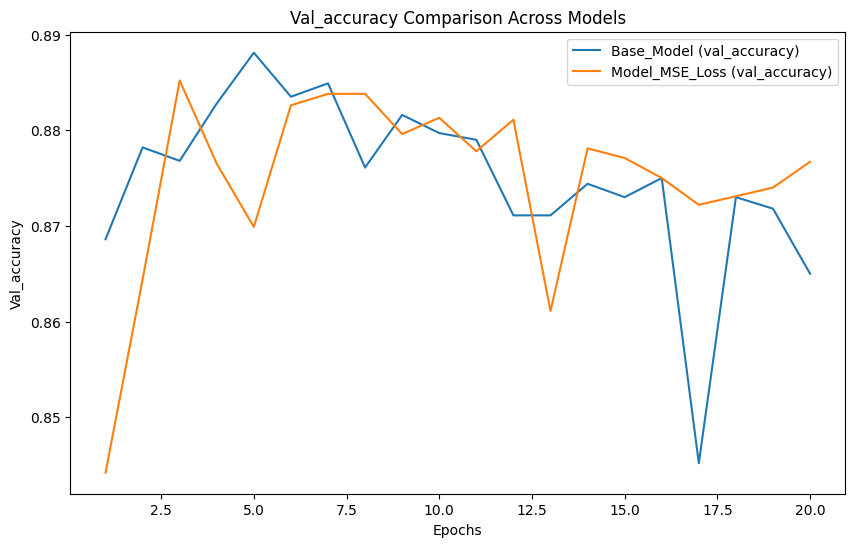

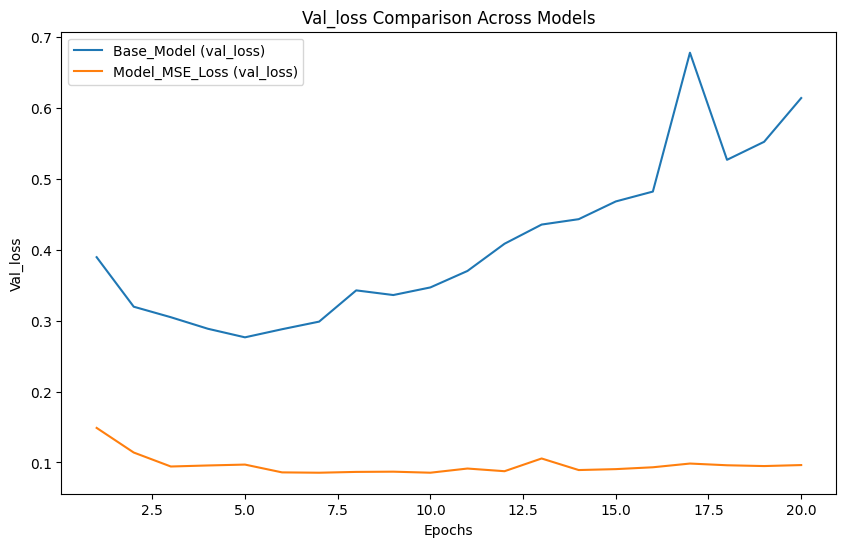

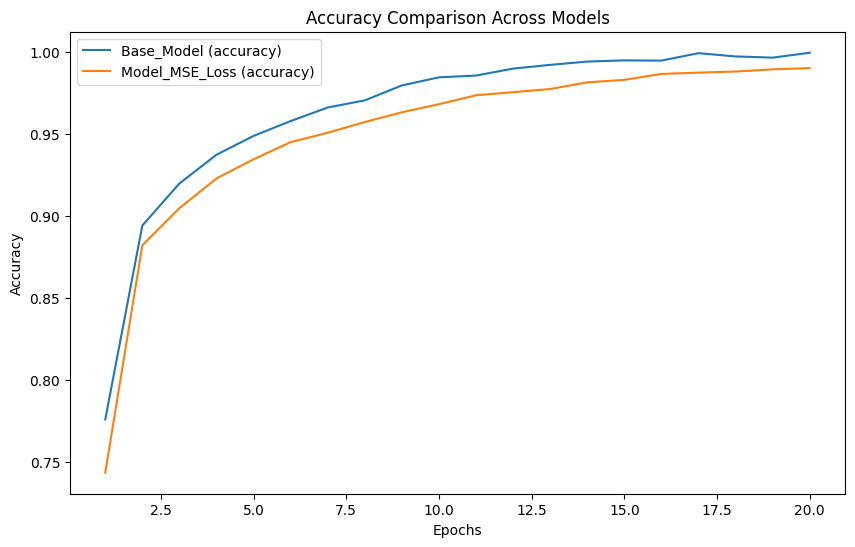

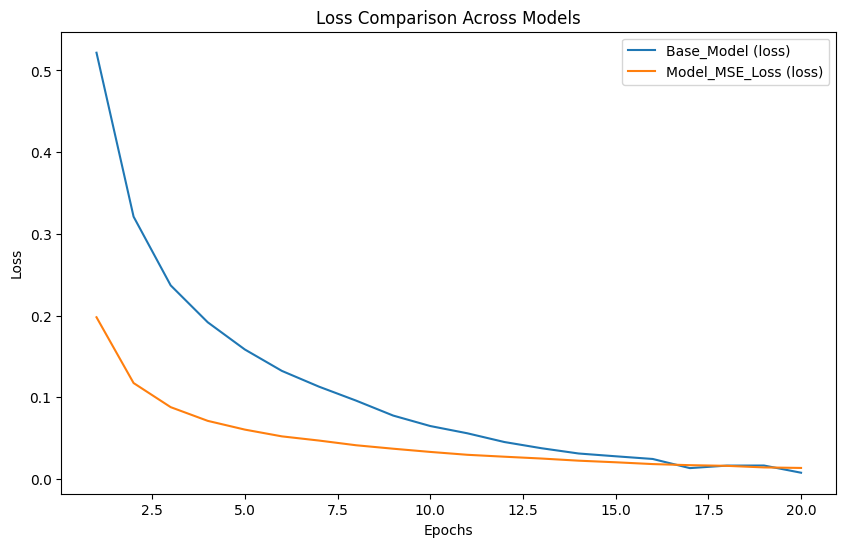

In [87]:
import matplotlib.pyplot as plt

# Dictionary of models and their histories
model_histories = {
    "Base_Model": Base_model,
    "Model_MSE_Loss": Model_MSE_LOSS,
 }

# Extract and display keys of histories
for model_name, model in model_histories.items():
    history_dict = model.history
    print(f"{model_name} history keys: {history_dict.keys()}")

# Function to plot training and validation accuracy/loss across models
def plot_metrics(metric):
    plt.figure(figsize=(10, 6))
    for model_name, model in model_histories.items():
        metric_values = model.history[metric]
        plt.plot(range(1, len(metric_values) + 1), metric_values, label=f"{model_name} ({metric})")

    plt.title(f'{metric.capitalize()} Comparison Across Models')
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.show()

# Plot validation accuracy
plot_metrics('val_accuracy')

# Plot validation loss
plot_metrics('val_loss')

plot_metrics('accuracy')

plot_metrics('loss')

Question 4 - Comparing of Tanh activation with base model

Base_Model history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_TANH_Activation history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


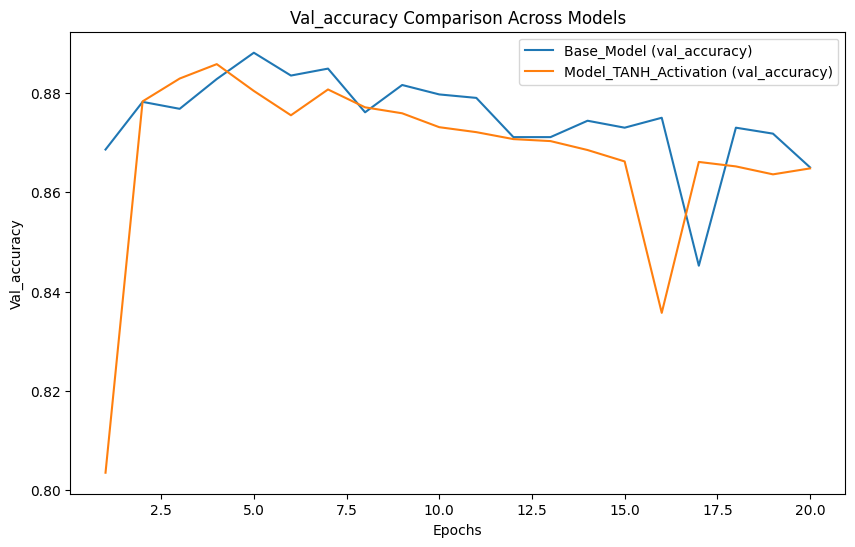

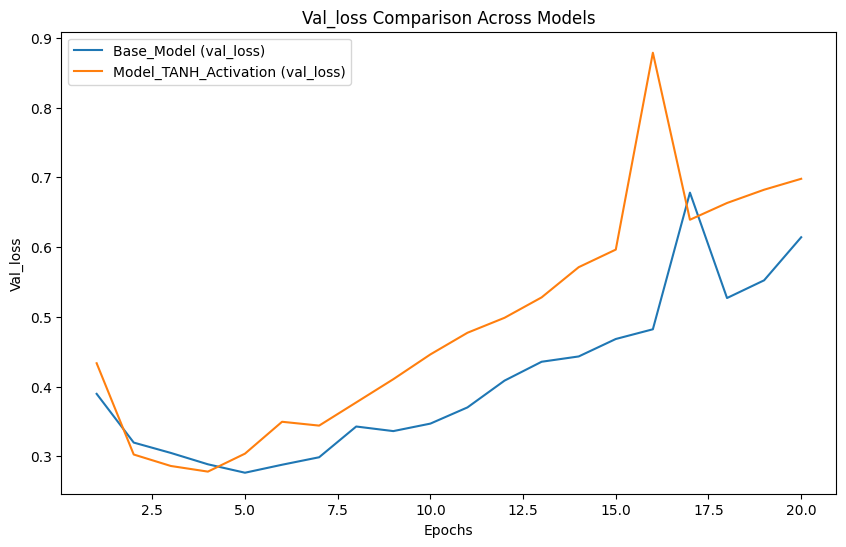

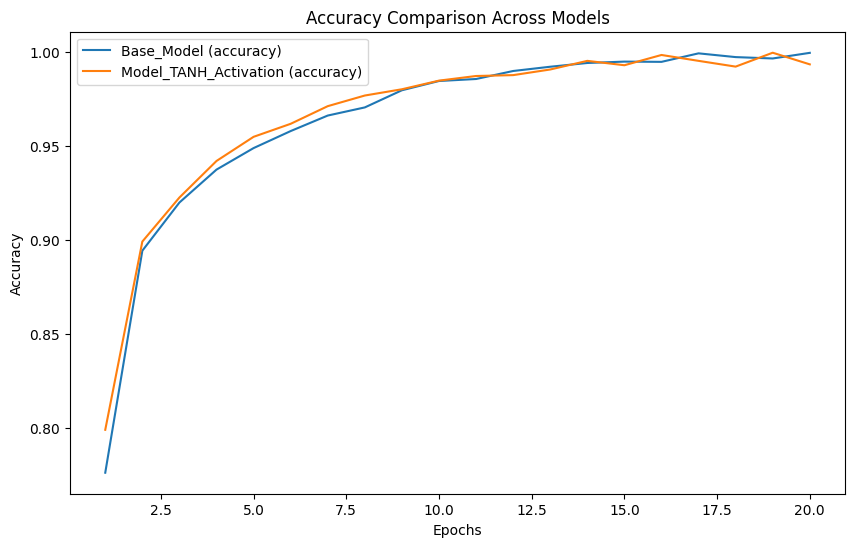

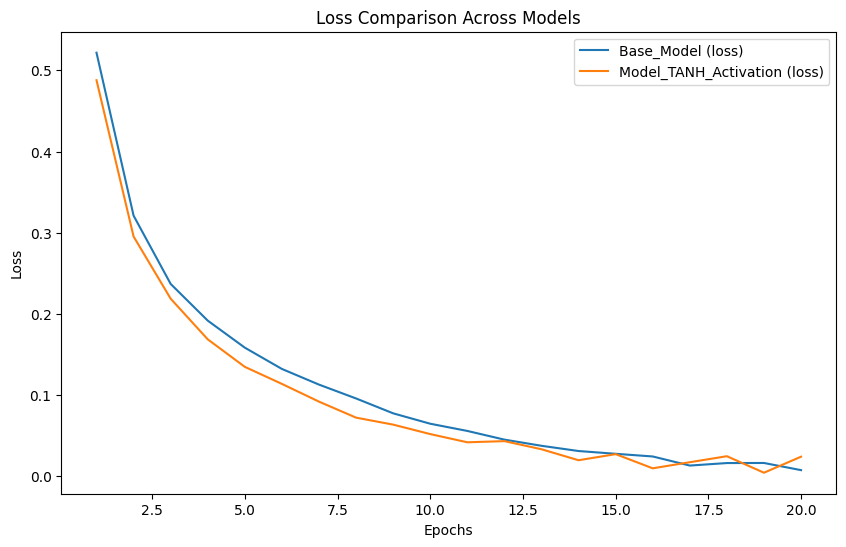

In [88]:
import matplotlib.pyplot as plt

# Dictionary of models and their histories
model_histories = {
    "Base_Model": Base_model,
    "Model_TANH_Activation": Model_TANH_ACT,
}

# Extract and display keys of histories
for model_name, model in model_histories.items():
    history_dict = model.history
    print(f"{model_name} history keys: {history_dict.keys()}")

# Function to plot training and validation accuracy/loss across models
def plot_metrics(metric):
    plt.figure(figsize=(10, 6))
    for model_name, model in model_histories.items():
        metric_values = model.history[metric]
        plt.plot(range(1, len(metric_values) + 1), metric_values, label=f"{model_name} ({metric})")

    plt.title(f'{metric.capitalize()} Comparison Across Models')
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.show()

# Plot validation accuracy
plot_metrics('val_accuracy')

# Plot validation loss
plot_metrics('val_loss')

plot_metrics('accuracy')

plot_metrics('loss')

Question 5 - Comparison of L2 regularization, Dropout and Base model

Base_Model history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_Regularization history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_Dropout history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


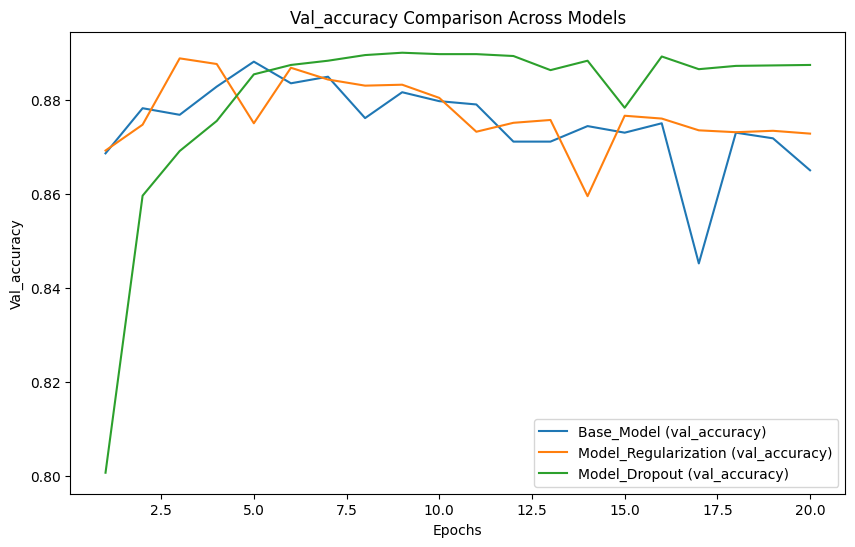

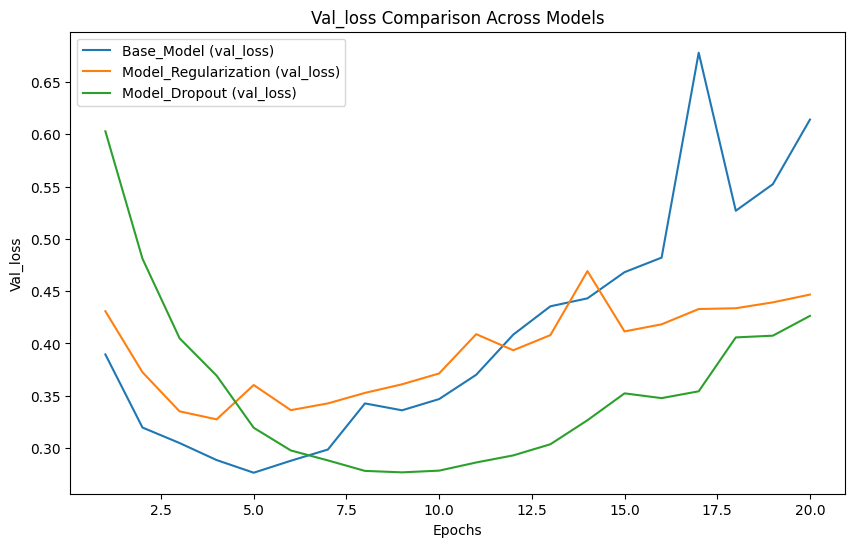

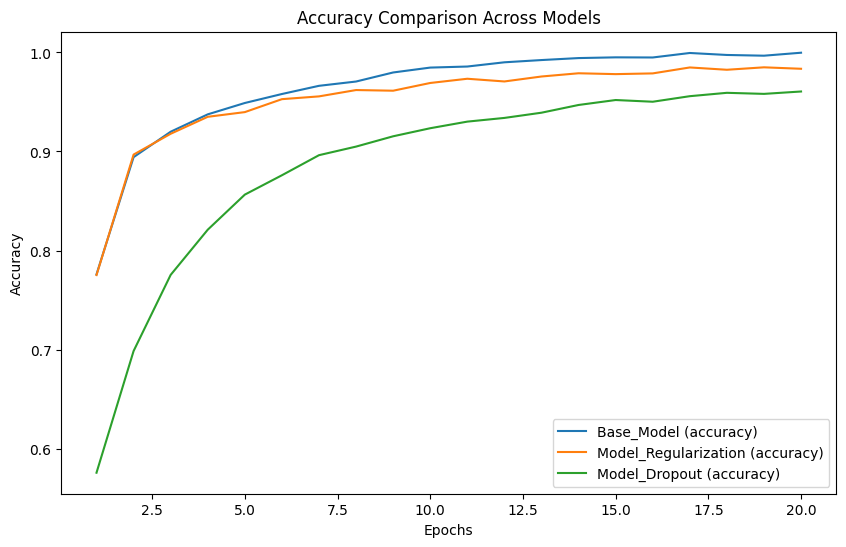

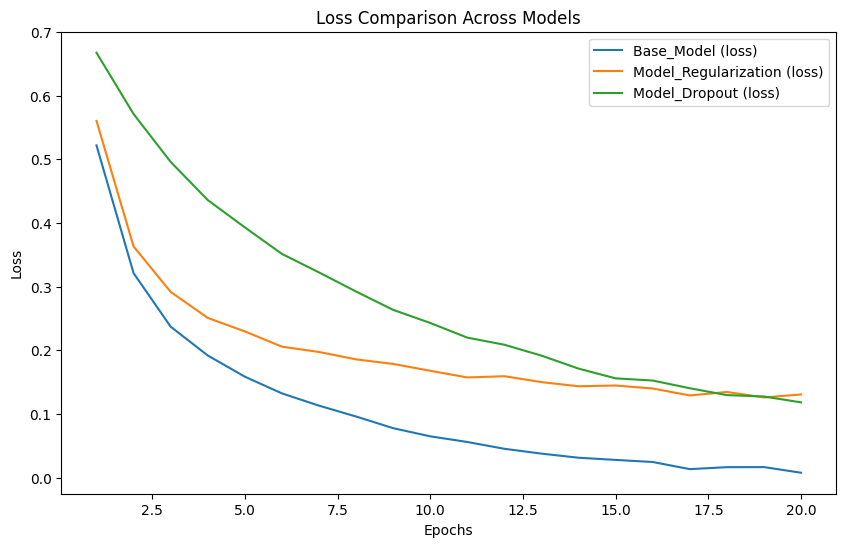

In [89]:
import matplotlib.pyplot as plt

# Dictionary of models and their histories
model_histories = {
    "Base_Model": Base_model,
    "Model_Regularization": Model_Reg_Tech,
    "Model_Dropout": Model_Drp_Tech
}

# Extract and display keys of histories
for model_name, model in model_histories.items():
    history_dict = model.history
    print(f"{model_name} history keys: {history_dict.keys()}")

# Function to plot training and validation accuracy/loss across models
def plot_metrics(metric):
    plt.figure(figsize=(10, 6))
    for model_name, model in model_histories.items():
        metric_values = model.history[metric]
        plt.plot(range(1, len(metric_values) + 1), metric_values, label=f"{model_name} ({metric})")

    plt.title(f'{metric.capitalize()} Comparison Across Models')
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.show()

# Plot validation accuracy
plot_metrics('val_accuracy')

# Plot validation loss
plot_metrics('val_loss')

plot_metrics('accuracy')

plot_metrics('loss')

Comparing all the models

Base_Model history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_1_Hidden_Layer history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_3_Hidden_Layer history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_32_Hidden_Units history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_64_Hidden_Units history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_MSE_Loss history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_TANH_Activation history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_Regularization history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_Dropout history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


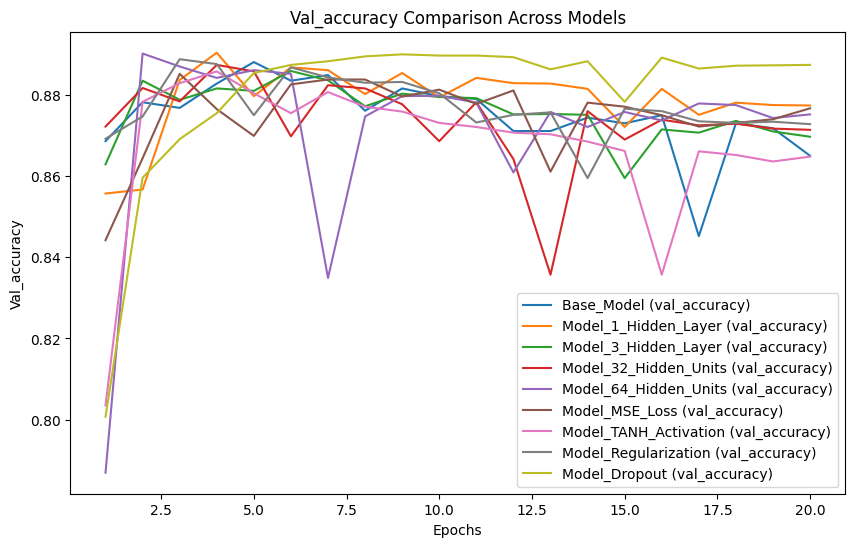

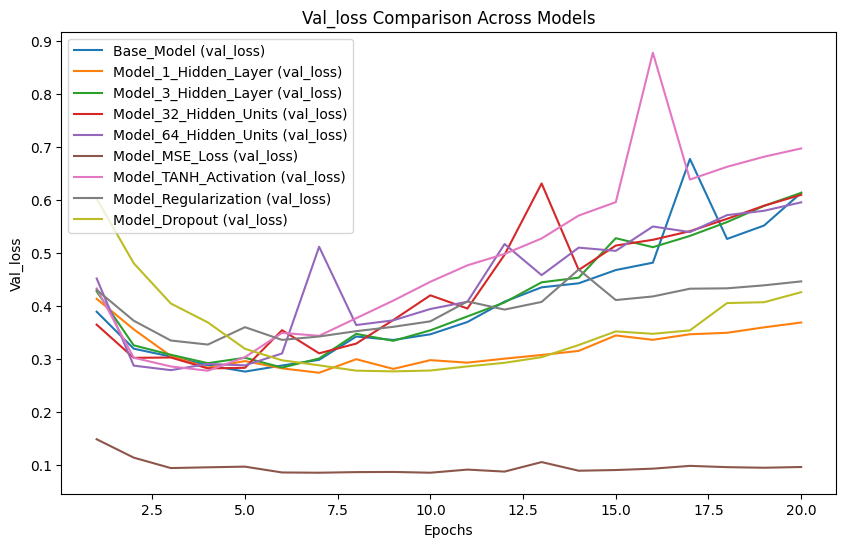

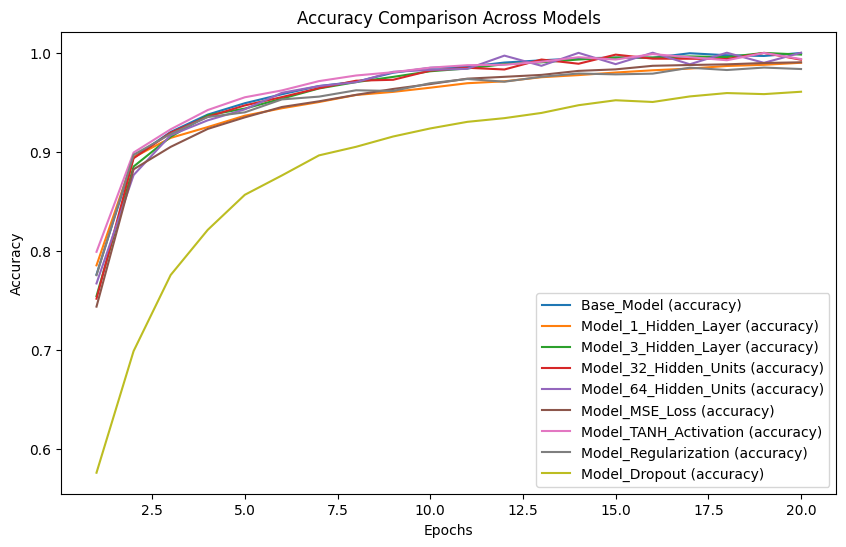

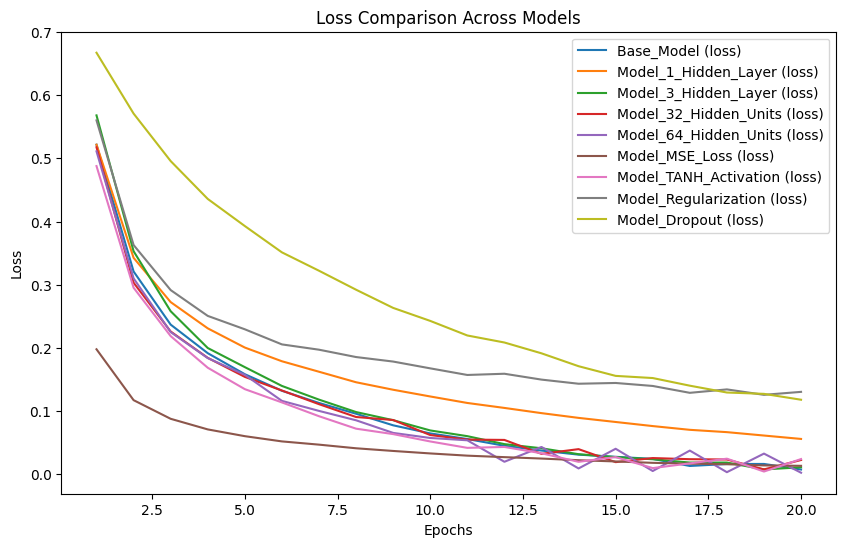

In [90]:
import matplotlib.pyplot as plt

# Dictionary of models and their histories
model_histories = {
    "Base_Model": Base_model,
    "Model_1_Hidden_Layer": Model_1_Hidden_Layer,
    "Model_3_Hidden_Layer": Model_3_Hidden_Layer,
    "Model_32_Hidden_Units": Model_32_Hidden_Units,
    "Model_64_Hidden_Units": Model_64_Hidden_Units,
    "Model_MSE_Loss": Model_MSE_LOSS,
    "Model_TANH_Activation": Model_TANH_ACT,
    "Model_Regularization": Model_Reg_Tech,
    "Model_Dropout": Model_Drp_Tech
}

# Extract and display keys of histories
for model_name, model in model_histories.items():
    history_dict = model.history
    print(f"{model_name} history keys: {history_dict.keys()}")

# Function to plot training and validation accuracy/loss across models
def plot_metrics(metric):
    plt.figure(figsize=(10, 6))
    for model_name, model in model_histories.items():
        metric_values = model.history[metric]
        plt.plot(range(1, len(metric_values) + 1), metric_values, label=f"{model_name} ({metric})")

    plt.title(f'{metric.capitalize()} Comparison Across Models')
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.show()

# Plot validation accuracy
plot_metrics('val_accuracy')

# Plot validation loss
plot_metrics('val_loss')

plot_metrics('accuracy')

plot_metrics('loss')


| Model    | Test Loss | Test Accuracy |
|----------|-----------|---------------|
| Base Model | 0.28      | 0.89          |
| 1HL      | 0.28      | 0.89          |
| 3HL      | 0.37      | 0.87          |
| 32HU     | 0.29      | 0.88          |
| 64HU     | 0.29      | 0.88          |
| MSE      | 0.09      | 0.88          |
| Tanh     | 0.28      | 0.88          |
| L2       | 0.34      | 0.88          |
| Dropout  | 0.32      | 0.88          |